In [2]:
import os
import math
import dill
from itertools import permutations

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.linear_model import HuberRegressor as hubreg

import suite2p as s2p

import TwoPUtils
import STX3KO_analyses as stx
from STX3KO_analyses import utilities as u

ko_mice = stx.ymaze_sess_deets.ko_mice
ctrl_mice = stx.ymaze_sess_deets.ctrl_mice


%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
figdir = "/mnt/BigDisk/YMazeResults/behavior/reversal"
os.makedirs(figdir,exist_ok=True)

{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel': -1, 'ravel_ind': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus2/2P_Data/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus2/2P_Data/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


0.11001807657812257
0.10904625799328695
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 3, 'scan': 8, 'novel': 1, 'ravel_ind': 0}
0.1100692616471082
0.16736622393861975
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': -1, 'ravel_ind': 0}
0.06032445223871624
0.11761779819386359
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel': 1, 'ravel_ind': 0}
0.5986160337525217
0.1284017130366221
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': -1, 'ravel_ind': 0}
0.04977265940030089
0.06784264128951935
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1, 'ravel_ind': 0}
0.09556160932095294
0.11449060078059704
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1, 'ravel_ind': 0}
0.30208560688972996
0.5298903020411834
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel': -1, 'ravel_ind': 0}
0.28154909265

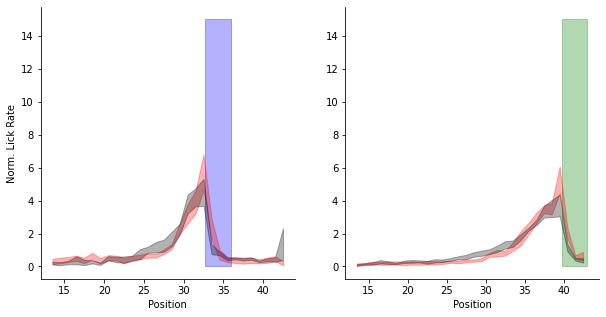

In [4]:
fig,ax = plt.subplots(1,2, figsize = [10,5])

ko_mu = {-1:[],1:[]}
for mouse in ko_mice:
    sess = u.load_single_day(mouse,day=0)
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
        print(lick_mean)
        mu, sem = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0), sp.stats.sem(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0, nan_policy='omit')
        ko_mu[lr].append(mu)
#         ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'], mu-sem, mu+sem, color='red', alpha = .3)
for ax_ind, lr in enumerate([-1,1]):
    arr = np.array(ko_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'],mu- sem, mu+sem,color='red', alpha = .3)

ctrl_mu = {-1:[],1:[]}
for mouse in ctrl_mice:
    sess = u.load_single_day(mouse,day=0)
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
        print(lick_mean)
        mu, sem = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0), sp.stats.sem(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0, nan_policy='omit')
        ctrl_mu[lr].append(mu)
#         ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'], mu-sem, mu+sem, color='red', alpha = .3)
for ax_ind, lr in enumerate([-1,1]):
    arr = np.array(ctrl_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'],mu- sem, mu+sem,color='black', alpha = .3)
    
    
ax[1].fill_betweenx([0,15], sess.rzone_late['tfront'], sess.rzone_late['tback'],zorder=0, color='green',alpha=.3)
ax[0].fill_betweenx([0,15],sess.rzone_early['tfront'], sess.rzone_early['tback'],zorder=0, color='blue',alpha=.3)

ax[0].set_xlabel('Position')
ax[1].set_xlabel('Position')
ax[0].set_ylabel('Norm. Lick Rate')
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)

fig.savefig(os.path.join(figdir, 'LR_norm_lickrate_day1.pdf'))

{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1, 'ravel_ind': 6}
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel': 1, 'ravel_ind': 5}
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 6, 'novel': -1, 'ravel_ind': 5}
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1, 'ravel_ind': 5}
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel': -1, 'ravel_ind': 5}
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel': -1, 'ravel_ind': 5}
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': 1, 'ravel_ind': 6}
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel': -1, 'ravel_ind': 5}
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': 1, 'ravel_ind': 7}
{'date': '05_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel': -1, 

/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


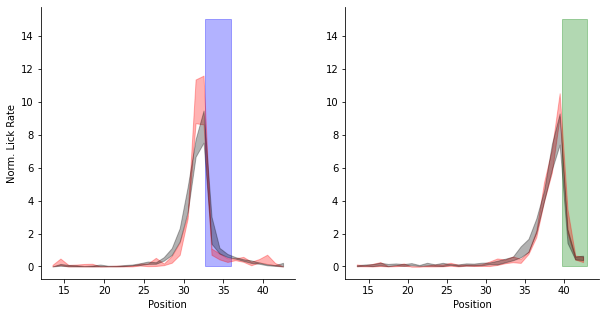

In [5]:
fig,ax = plt.subplots(1,2, figsize = [10,5])

ko_mu = {-1:[],1:[]}
for mouse in ko_mice:
    sess = u.load_single_day(mouse,day=5)
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
        
        mu, sem = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0), sp.stats.sem(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0, nan_policy='omit')
        
#         mu = sp.stats.zscore(np.nanmean(sess.trial_matrices['licks'][trial_mask,:], axis=0))
        ko_mu[lr].append(mu)

        
for ax_ind, lr in enumerate([-1,1]):
    arr = np.array(ko_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'],mu- sem, mu+sem,color='red', alpha = .3)
#     ax[ax_ind].plot(sess.trial_matrices['bin_centers'],arr.T)

ctrl_mu = {-1:[],1:[]}
for mouse in ctrl_mice:
    sess = u.load_single_day(mouse,day=5)
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
#         print(lick_mean)
        mu, sem = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0), sp.stats.sem(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0, nan_policy='omit')
#         mu = sp.stats.zscore(np.nanmean(sess.trial_matrices['licks'][trial_mask,:], axis=0))
        ctrl_mu[lr].append(mu)
#         ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'], mu-sem, mu+sem, color='red', alpha = .3)
for ax_ind, lr in enumerate([-1,1]):
    arr = np.array(ctrl_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'],mu- sem, mu+sem,color='black', alpha = .3)
    
    
ax[1].fill_betweenx([0,15], sess.rzone_late['tfront'], sess.rzone_late['tback'],zorder=0, color='green',alpha=.3)
ax[0].fill_betweenx([0,15],sess.rzone_early['tfront'], sess.rzone_early['tback'],zorder=0, color='blue',alpha=.3)

ax[0].set_xlabel('Position')
ax[1].set_xlabel('Position')
ax[0].set_ylabel('Norm. Lick Rate')
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)

fig.savefig(os.path.join(figdir, 'LR_norm_lickrate_day6.pdf'))

{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel': -1, 'ravel_ind': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus2/2P_Data/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus2/2P_Data/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


0.11001807657812257
0.10904625799328695
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 3, 'scan': 8, 'novel': 1, 'ravel_ind': 0}
0.1100692616471082
0.16736622393861975
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': -1, 'ravel_ind': 0}
0.06032445223871624
0.11761779819386359
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel': 1, 'ravel_ind': 0}
0.5986160337525217
0.1284017130366221
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': -1, 'ravel_ind': 0}
0.04977265940030089
0.06784264128951935
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1, 'ravel_ind': 0}
0.09556160932095294
0.11449060078059704
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1, 'ravel_ind': 0}
0.30208560688972996
0.5298903020411834
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel': -1, 'ravel_ind': 0}
0.28154909265

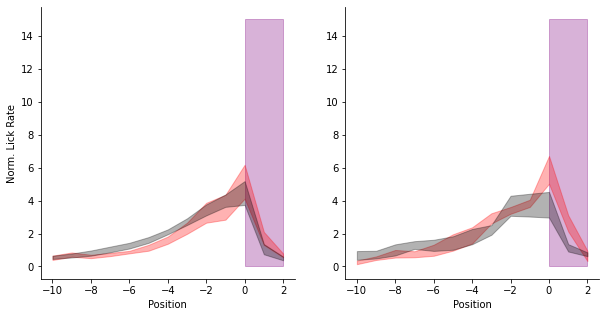

In [6]:
fig,ax = plt.subplots(1,2, figsize = [10,5])

ko_mu = {'fam':[],'nov':[]}
x = np.arange(-10,3)
for mouse in ko_mice:
    sess = u.load_single_day(mouse,day=0)
    bin_edges = sess.trial_matrices['bin_edges']
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
        print(lick_mean)
        mu = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0)
        
        if sess.novel_arm ==-1:
            
            fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

        elif sess.novel_arm == 1:
            fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
        
        if lr == sess.novel_arm:
            ko_mu['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
        else:
            ko_mu['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
            
ctrl_mu = {'fam':[],'nov':[]}
x = np.arange(-10,3)
for mouse in ctrl_mice:
    sess = u.load_single_day(mouse,day=0)
    bin_edges = sess.trial_matrices['bin_edges']
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
        print(lick_mean)
        mu = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0)
        
        if sess.novel_arm ==-1:
            
            fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

        elif sess.novel_arm == 1:
            fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
        
        if lr == sess.novel_arm:
            ctrl_mu['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
        else:
            ctrl_mu['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
        
    


for ax_ind, lr in enumerate(['fam', 'nov']):
    arr = np.array(ko_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(x, mu- sem, mu+sem,color='red', alpha = .3)
    
    arr = np.array(ctrl_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(x, mu- sem, mu+sem,color='black', alpha = .3)
#     ax[ax_ind].plot(x, np.array(ko_mu[lr]).T,color='red', alpha = .3)


    
ax[0].fill_betweenx([0,15], 0, 2, zorder=0, color='purple',alpha=.3)
ax[1].fill_betweenx([0,15],0, 2, zorder=0, color='purple',alpha=.3)

ax[0].set_xlabel('Position')
ax[1].set_xlabel('Position')
ax[0].set_ylabel('Norm. Lick Rate')
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)

fig.savefig(os.path.join(figdir, 'famnov_norm_lickrate_day1.pdf'))

{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1, 'ravel_ind': 6}
0.060054894931674326
0.07121593049563117
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel': 1, 'ravel_ind': 5}
0.03676734009364598
0.04995217805680697
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 6, 'novel': -1, 'ravel_ind': 5}
0.03981694341904314
0.03767281701217867
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1, 'ravel_ind': 5}
0.03586871894724765
0.04141683373820595
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel': -1, 'ravel_ind': 5}
0.021589055587124907
0.020803115907144464
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel': -1, 'ravel_ind': 5}
0.09974398653281691
0.09627240513598094
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': 1, 'ravel_ind': 6}
0.1287735153906072
0.23219426191059286
{'date'

/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


0.12403511881251388
0.12518638097135698


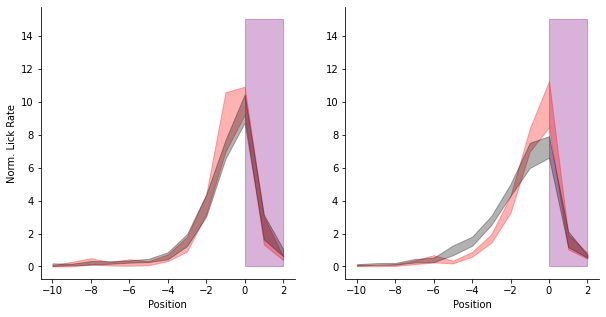

In [7]:
fig,ax = plt.subplots(1,2, figsize = [10,5])

ko_mu = {'fam':[],'nov':[]}
x = np.arange(-10,3)
for mouse in ko_mice:
    sess = u.load_single_day(mouse,day=5)
    bin_edges = sess.trial_matrices['bin_edges']
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
        print(lick_mean)
        mu = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0)
        
        if sess.novel_arm ==-1:
            
            fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

        elif sess.novel_arm == 1:
            fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
        
        if lr == sess.novel_arm:
            ko_mu['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
        else:
            ko_mu['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
            
ctrl_mu = {'fam':[],'nov':[]}
x = np.arange(-10,3)
for mouse in ctrl_mice:
    sess = u.load_single_day(mouse,day=5)
    bin_edges = sess.trial_matrices['bin_edges']
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
        print(lick_mean)
        mu = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0)
        
        if sess.novel_arm ==-1:
            
            fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

        elif sess.novel_arm == 1:
            fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
        
        if lr == sess.novel_arm:
            ctrl_mu['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
        else:
            ctrl_mu['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
        
    


for ax_ind, lr in enumerate(['fam', 'nov']):
    arr = np.array(ko_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(x, mu- sem, mu+sem,color='red', alpha = .3)
    
    arr = np.array(ctrl_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(x, mu- sem, mu+sem,color='black', alpha = .3)
#     ax[ax_ind].plot(x, np.array(ko_mu[lr]).T,color='red', alpha = .3)


    
ax[0].fill_betweenx([0,15], 0, 2, zorder=0, color='purple',alpha=.3)
ax[1].fill_betweenx([0,15],0, 2, zorder=0, color='purple',alpha=.3)

ax[0].set_xlabel('Position')
ax[1].set_xlabel('Position')
ax[0].set_ylabel('Norm. Lick Rate')
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)

fig.savefig(os.path.join(figdir, 'famnov_norm_lickrate_day6.pdf'))

In [8]:
# reversal lick rates
def reversal_lickmat(mice, date_inds = [6,7,8]):
    l_lickmat = np.zeros([len(mice), 60, 30])*np.nan
    r_lickmat = np.zeros([len(mice), 60, 30])*np.nan
    
    b_l = np.zeros([len(mice),1,1])
    b_r = np.zeros([len(mice),1,1])
    
    for i, mouse in enumerate(mice):
        concat_sess = u.single_mouse_concat_sessions(mouse, date_inds = [6,7,])
        
        b_mask = (concat_sess.trial_info['block_number']<2) * (concat_sess.trial_info['sess_num']==6)
        b_l_mask, b_r_mask = (b_mask * (concat_sess.trial_info['LR']==-1)), (b_mask*(concat_sess.trial_info['LR']==1))
    
        rev_mask = ((concat_sess.trial_info['block_number']>=2)*(concat_sess.trial_info['sess_num']==6) + (concat_sess.trial_info['sess_num']==7) + \
              (concat_sess.trial_info['sess_num']==8)*(concat_sess.trial_info['block_number']<2))>0

        l_rev_mask = rev_mask * (concat_sess.trial_info['LR']==-1)
        r_rev_mask = rev_mask * (concat_sess.trial_info['LR']==1)
        
        tmp_l = concat_sess.trial_matrices['licks'][l_rev_mask,:]
        max_trial = np.minimum(60, tmp_l.shape[0])
        print(max_trial)
        l_lickmat[i,:max_trial,:] = tmp_l[:max_trial,:]
        
        tmp_r = concat_sess.trial_matrices['licks'][r_rev_mask,:]
        max_trial = np.minimum(60, tmp_r.shape[0])
        print(max_trial)
        r_lickmat[i,:max_trial,:] = tmp_r[:max_trial,:]
        
        b_l[i] = np.nanmean(np.nanmean(concat_sess.trial_matrices['licks'][b_l_mask,:],axis=0))
        b_r[i] = np.nanmean(np.nanmean(concat_sess.trial_matrices['licks'][b_r_mask,:], axis=0))
        
    return l_lickmat/b_l, r_lickmat/b_r

In [9]:
sess= u.load_single_day(ko_mice[0],0)

{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel': -1, 'ravel_ind': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus2/2P_Data/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus2/2P_Data/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


In [10]:
ko_l_lickmat, ko_r_lickmat = reversal_lickmat(ko_mice)

/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus1/2P_Data/4467975.1/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus1/2P_Data/4467975.1/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus1/2P_Data/4467975.1/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_002_010.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus1/2P_Data/4467975.1/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_002_010.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
51


In [11]:
ctrl_l_lickmat, ctrl_r_lickmat = reversal_lickmat(ctrl_mice)

05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60
06_12_2020 YMaze_LNovel
06_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60
06_12_2020 YMaze_LNovel
06_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60


-0.3123728324363981 0.7627441776959534
-3.3822122272047266 0.009610116633380815
-3.7254856483666288 0.0058253513405640625
-2.6553951358922774 0.02901195807434766
-2.531173968619476 0.03519104886145092
-3.921720019086529 0.004407716107824665


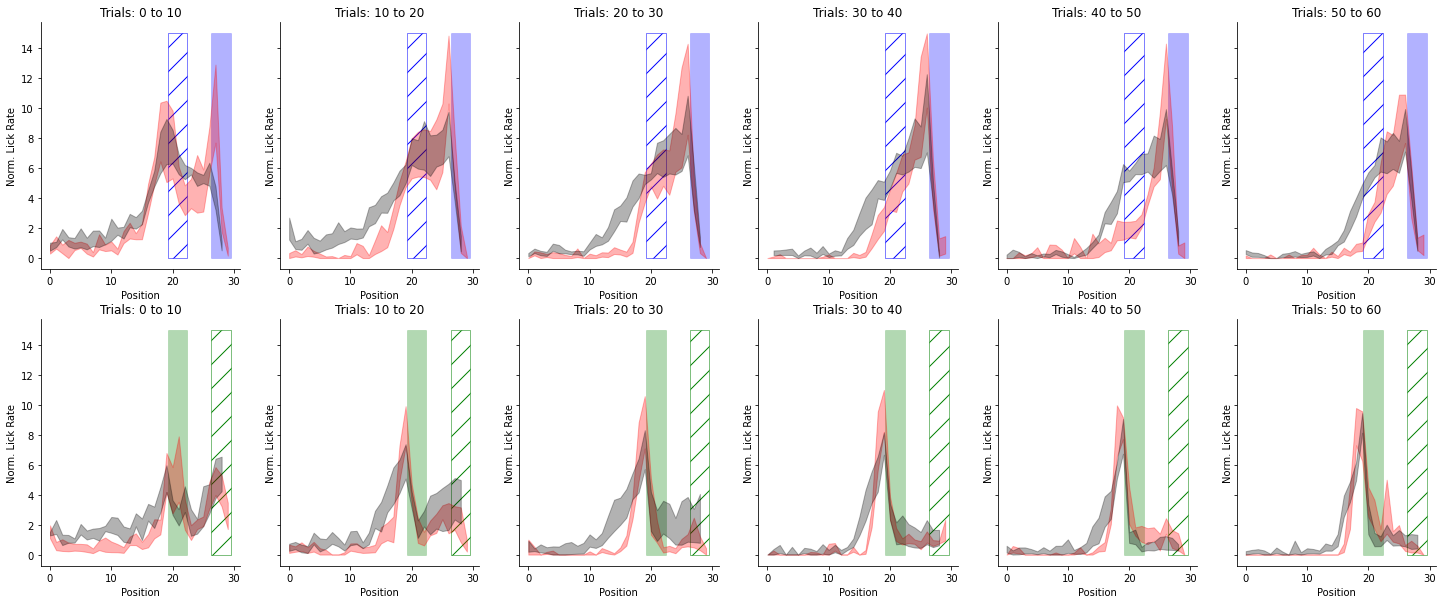

In [13]:
fig,ax = plt.subplots(2,6, figsize= [25,10], sharey=True)
for i,start in enumerate(range(0,60,10)):
    
    ax[0,i].fill_betweenx([0,15], sess.rzone_early['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_early['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="none",alpha=1, hatch='/', edgecolor='blue',linewidth=0.5)
    ax[0,i].fill_betweenx([0,15], sess.rzone_late['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_late['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="blue",alpha=.3, linewidth=0.5)
    
    mu, sem = np.nanmean(np.nanmean(ko_l_lickmat[:,start:start+10,:],axis=1),axis=0), sp.stats.sem(np.nanmean(ko_l_lickmat[:,start:start+10,:],axis=1),axis=0)
#     ax[i].plot(ko_l_lickmat[:,start:start+10,:].mean(axis=1).T)
    ax[0,i].fill_between(np.arange(30), mu-sem, mu+sem, color='red', alpha=.3)
    
    mu, sem = ctrl_l_lickmat[:,start:start+10,:].mean(axis=1).mean(axis=0), sp.stats.sem(ctrl_l_lickmat[:,start:start+10,:].mean(axis=1),axis=0)
    ax[0,i].fill_between(np.arange(30), mu-sem, mu+sem, color='black', alpha=.3)
    
    
    t_early_bins = sess.trial_matrices['bin_edges'][1:]
    rzone_early = (t_early_bins>=sess.rzone_early['t_antic'])*(t_early_bins<=sess.rzone_early['tfront'])
    _ko = np.nanmean(np.nanmean(ko_l_lickmat[:,start:start+10,:],axis=1)[:,rzone_early],axis=1)
    _ctrl = np.nanmean(np.nanmean(ctrl_l_lickmat[:,start:start+10,:],axis=1)[:,rzone_early],axis=1)
    t,p = sp.stats.ttest_ind(_ko,_ctrl)
    print(t,p)
    
    
    ax[1,i].fill_betweenx([0,15], sess.rzone_late['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_late['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="none",alpha=1, hatch='/', edgecolor='green',linewidth=0.5)
    ax[1,i].fill_betweenx([0,15], sess.rzone_early['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_early['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="green",alpha=.3, linewidth=0.5)
    
    mu, sem = np.nanmean(np.nanmean(ko_r_lickmat[:,start:start+10,:],axis=1),axis=0), sp.stats.sem(np.nanmean(ko_r_lickmat[:,start:start+10,:], axis=1),axis=0)
#     ax[i].plot(ko_l_lickmat[:,start:start+10,:].mean(axis=1).T)
    ax[1,i].fill_between(np.arange(30), mu-sem, mu+sem, color='red', alpha=.3)
    
    mu, sem = ctrl_r_lickmat[:,start:start+10,:].mean(axis=1).mean(axis=0), sp.stats.sem(ctrl_r_lickmat[:,start:start+10,:].mean(axis=1),axis=0)
    ax[1,i].fill_between(np.arange(30), mu-sem, mu+sem, color='black', alpha=.3)
    
    for r in [0,1]:
        ax[r,i].spines['top'].set_visible(False)
        ax[r,i].spines['right'].set_visible(False)
        
        ax[r,i].set_xlabel('Position')
        ax[r,i].set_ylabel('Norm. Lick Rate')
        ax[r,i].set_title("Trials: %d to %d" % (start, start+10))
fig.savefig(os.path.join(figdir, 'reversal_lickrate.pdf'))

In [21]:
def get_early_licks(sess):
    t_early_bins = sess.trial_matrices['bin_edges'][1:]
    rzone_early = (t_early_bins>=sess.rzone_early['t_antic'])*(t_early_bins<=sess.rzone_early['tfront'])
    baseline_mask = (sess.trial_info['sess_num']==6)*(sess.trial_info['LR']==-1)*(sess.trial_info['block_number']<2)
    ret_mask = (sess.trial_info['sess_num']==8)*(sess.trial_info['block_number']>1)
    rev_mask = (~baseline_mask)*(sess.trial_info['LR']==-1)*(~ret_mask)
    
    lr_early = sess.trial_matrices['licks'][:, rzone_early].mean(axis=1)
    lr_b = lr_early[baseline_mask].mean()
    lr_rev = lr_early[rev_mask]
    return lr_rev/lr_b
    

def get_early_lick_slope(sess):
    lr_rev = get_early_licks(sess)
    max_trial = np.minimum(lr_rev.shape[0],40)
    x = np.arange(max_trial)
    res = sp.stats.linregress(x,lr_rev[:max_trial])
    return res.slope



In [16]:
ko_lr_rev = [get_early_licks(u.single_mouse_concat_sessions(mouse, date_inds=[6,7,8])) for mouse in ko_mice]
ctrl_lr_rev = [get_early_licks(u.single_mouse_concat_sessions(mouse, date_inds=[6,7,8])) for mouse in ctrl_mice]

/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus1/2P_Data/4467975.1/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus1/2P_Data/4467975.1/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus1/2P_Data/4467975.1/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_002_010.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus1/2P_Data/4467975.1/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_002_010.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel


152


<ipython-input-17-1316452beed4>:30: RuntimeWarning: Mean of empty slice
  mu,sem = np.nanmean(ko_lr_arr,axis=0), sp.stats.sem(ko_lr_arr, axis=0, nan_policy='omit')


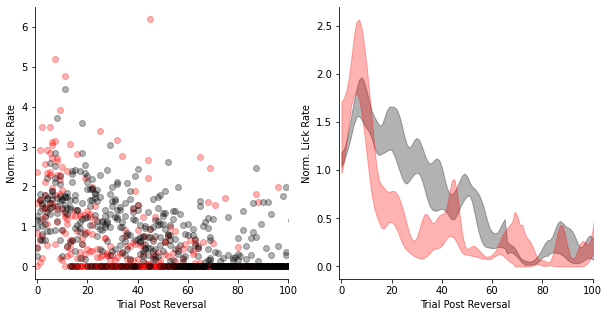

In [17]:
fig, ax = plt.subplots(1,2,figsize=[10,5])

max_x = 0

for lr in ko_lr_rev:    
    x = np.arange(0,lr.shape[0])
    max_x = np.maximum(lr.shape[0],max_x)
    ax[0].scatter(x,lr,color='red', alpha=.3)
    
for lr in ctrl_lr_rev:
    x = np.arange(0,lr.shape[0])
    max_x = np.maximum(lr.shape[0],max_x)
    ax[0].scatter(x,lr,color='black',alpha=.3)

print(max_x)
ko_lr_arr = np.zeros([len(ko_lr_rev), max_x])*np.nan
ctrl_lr_arr = np.zeros([len(ctrl_lr_rev), max_x])*np.nan
for i, lr in enumerate(ko_lr_rev):
    n = lr.shape[0]
    ko_lr_arr[i,:n] = sp.ndimage.filters.gaussian_filter1d(lr,2)
    
for i, lr in enumerate(ctrl_lr_rev):
    n = lr.shape[0]
    ctrl_lr_arr[i,:n] = sp.ndimage.filters.gaussian_filter1d(lr,2)
    
x = np.arange(0, max_x)
mu,sem = np.nanmean(ctrl_lr_arr,axis=0), sp.stats.sem(ctrl_lr_arr, axis=0, nan_policy='omit')
ax[1].fill_between(x, mu+sem,mu-sem, color='black', alpha= .3)

mu,sem = np.nanmean(ko_lr_arr,axis=0), sp.stats.sem(ko_lr_arr, axis=0, nan_policy='omit')
ax[1].fill_between(x, mu+sem,mu-sem, color='red', alpha= .3)

for r in range(2):
    ax[r].set_xlim([-1,100])
    ax[r].spines['top'].set_visible(False)
    ax[r].spines['right'].set_visible(False)
    ax[r].set_xlabel('Trial Post Reversal')
    ax[r].set_ylabel('Norm. Lick Rate')
    
fig.savefig(os.path.join(figdir, 'reversal_early_lr.pdf'))

In [22]:
ko_slopes = np.array([get_early_lick_slope(u.single_mouse_concat_sessions(mouse, date_inds=[6,7])) for mouse in ko_mice])
ctrl_slopes = np.array([get_early_lick_slope(u.single_mouse_concat_sessions(mouse, date_inds=[6,7])) for mouse in ctrl_mice])

04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
05_12_2020 YMaze_LNovel
05_12_

-2.578080750491558 0.03271381258938677
-2.1933784650417927 0.028280122568276955


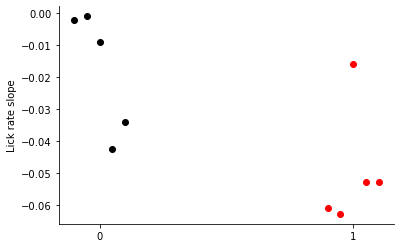

In [23]:
fig, ax = plt.subplots()
ax.scatter(np.linspace(-.1,.1,num=5)+1, ko_slopes, color='red')
ax.scatter(np.linspace(-.1,.1,num=5), ctrl_slopes, color='black')
t,p = sp.stats.ttest_ind(ko_slopes, ctrl_slopes)
print(t,p)
t,p = sp.stats.ranksums(ko_slopes, ctrl_slopes)
print(t,p)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Lick rate slope')
ax.set_xticks([0,1])

fig.savefig(os.path.join(figdir, 'reversal_early_rz_slope.pdf'))


In [11]:
day = 0
ctrl_speeds = {'stemspeed_pre':[], 
             'stemspeed_fam_post': [],
             'stemspeed_post': [],
             'stemspeed_novel': [],
             'armspeed_pre': [],
             'armspeed_post': [],
             'armspeed_novel': []}

fig, ax = plt.subplots(2,2)

for mouse in ctrl_mice:
    sess = sess = u.load_single_day(mouse,day=day)

    last_block_ind = np.argwhere(sess.trial_info['block_number']==5)[0][0]
    
    last_block_fam = (sess.trial_info['LR']==-1*sess.novel_arm)*(sess.trial_info['block_number']==5)
    early_block_fam = (sess.trial_info['LR']==-1*sess.novel_arm)*(sess.trial_info['block_number']<5)
    last_block_nov = (sess.trial_info['LR']==sess.novel_arm)*(sess.trial_info['block_number']==5)
    
    stemspeed = np.nanmean(sess.trial_matrices['speed'][:,:15], axis=-1)
    armspeed = np.nanmean(sess.trial_matrices['speed'][:,15:], axis=-1)
    
    ctrl_speeds['stemspeed_pre'].append(stemspeed[early_block_fam][-5:].mean())
    ctrl_speeds['stemspeed_post'].append(stemspeed[last_block_ind:last_block_ind+5].mean())
    ctrl_speeds['stemspeed_fam_post'].append(stemspeed[last_block_fam][:5].mean())
    ctrl_speeds['stemspeed_novel'].append(stemspeed[last_block_nov][:5].mean())
    
    ctrl_speeds['armspeed_pre'].append(armspeed[early_block_fam][-5:].mean())
    ctrl_speeds['armspeed_post'].append(armspeed[last_block_fam][:5].mean())
    ctrl_speeds['armspeed_novel'].append(armspeed[last_block_nov][:5].mean())
    
    
    
#     armspeed= np.nanmean(sess.trial_matrices['speed'][last_block_ind-10:,15:], axis=-1)
    
    ax[0,0].plot(stemspeed) , c = sess.novel_arm*sess.trial_info['LR'][last_block_ind-10:])
#     print(trials)
#     ax[0,0].scatter(trials, armspeed/armspeed.mean() , c = sess.novel_arm*sess.trial_info['LR'][last_block_ind-10:])
    
#     stemspeed= np.nanmean(sess.trial_matrices['speed'][last_block_ind-10:,:15], axis=-1)
#     ax[1,0].scatter(trials, armspeed/armspeed.mean() , c = sess.novel_arm*sess.trial_info['LR'][last_block_ind-10:])
    
ko_speeds = {'stemspeed_pre':[], 
             'stemspeed_fam_post': [],
             'stemspeed_post': [],
             'stemspeed_novel': [],
             'armspeed_pre': [],
             'armspeed_post': [],
             'armspeed_novel': []}
 
for mouse in ko_mice:
    sess = sess = u.load_single_day(mouse,day=day)

    sess.add_timeseries(speed=sess.vr_data['dz']._values)
    sess.add_pos_binned_trial_matrix('speed')
    
    last_block_ind = np.argwhere(sess.trial_info['block_number']==5)[0][0]
    
    last_block_fam = (sess.trial_info['LR']==-1*sess.novel_arm)*(sess.trial_info['block_number']==5)
    early_block_fam = (sess.trial_info['LR']==-1*sess.novel_arm)*(sess.trial_info['block_number']<5)
    last_block_nov = (sess.trial_info['LR']==sess.novel_arm)*(sess.trial_info['block_number']==5)
    
    stemspeed = np.nanmean(sess.trial_matrices['speed'][:,:15], axis=-1)
    armspeed = np.nanmean(sess.trial_matrices['speed'][:,15:], axis=-1)
    
    ko_speeds['stemspeed_pre'].append(stemspeed[early_block_fam][-5:].mean())
    ko_speeds['stemspeed_post'].append(stemspeed[last_block_ind:last_block_ind+5].mean())
    ko_speeds['stemspeed_fam_post'].append(stemspeed[last_block_fam][:5].mean())
    ko_speeds['stemspeed_novel'].append(stemspeed[last_block_nov][:5].mean())
    
    
    ko_speeds['armspeed_pre'].append(armspeed[early_block_fam][-5:].mean())
    ko_speeds['armspeed_post'].append(armspeed[last_block_fam][:5].mean())
    ko_speeds['armspeed_novel'].append(armspeed[last_block_nov][:5].mean())
    
#     armspeed= np.nanmean(sess.trial_matrices['speed'][last_block_ind-10:,15:], axis=-1)
#     trials = np.arange(-10,armspeed.shape[0]-10)
#     ax[0,1].scatter(trials, armspeed/armspeed.mean() , c = sess.novel_arm*sess.trial_info['LR'][last_block_ind-10:])
    
#     stemspeed= np.nanmean(sess.trial_matrices['speed'][last_block_ind-10:,:15], axis=-1)
#     ax[1,1].scatter(trials, armspeed/armspeed.mean() , c = sess.novel_arm*sess.trial_info['LR'][last_block_ind-10:])

{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel': -1, 'ravel_ind': 0}
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': 1, 'ravel_ind': 0}
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel': -1, 'ravel_ind': 0}
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 2, 'scan': 18, 'novel': 1, 'ravel_ind': 1}
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': -1, 'ravel_ind': 0}
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel': -1, 'ravel_ind': 1}
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 3, 'scan': 8, 'novel': 1, 'ravel_ind': 0}
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': -1, 'ravel_ind': 0}
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel': 1, 'ravel_ind': 0}
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel': -1

In [12]:
t,p = sp.stats.ttest_rel(ctrl_speeds['stemspeed_pre'],ctrl_speeds['stemspeed_post'])
print(t,p)

t,p = sp.stats.ttest_rel(ctrl_speeds['stemspeed_pre'],ctrl_speeds['stemspeed_novel'])
print(t,p)

t,p = sp.stats.ttest_rel(ctrl_speeds['armspeed_pre'],ctrl_speeds['armspeed_post'])
print(t,p)

t,p = sp.stats.ttest_rel(ctrl_speeds['armspeed_pre'],ctrl_speeds['armspeed_novel'])
print(t,p)

4.4308746427982895 0.011414275001015852
2.985025521876915 0.040536895909289335
2.9453834264003844 0.04216254550170379
2.6748698805822158 0.05552393489163538


In [13]:
t,p = sp.stats.ttest_rel(ko_speeds['stemspeed_pre'],ko_speeds['stemspeed_post'])
print(t,p)


t,p = sp.stats.ttest_rel(ko_speeds['stemspeed_pre'],ko_speeds['stemspeed_novel'])

print(t,p)

t,p = sp.stats.ttest_rel(ko_speeds['armspeed_pre'],ko_speeds['armspeed_post'])
print(t,p)

t,p = sp.stats.ttest_rel(ko_speeds['armspeed_pre'],ko_speeds['armspeed_novel'])
print(t,p)

6.501951203461055 0.002886790222874055
3.1954094074739694 0.03304516358594851
1.7991387096065876 0.14638501932732476
1.905776430198398 0.12937419542039882


In [14]:
t,p = sp.stats.ttest_ind(np.array(ko_speeds['stemspeed_pre'])-np.array(ko_speeds['stemspeed_fam_post']),np.array(ctrl_speeds['stemspeed_pre'])-np.array(ctrl_speeds['stemspeed_fam_post']))
print(t,p)

-1.9660241756368413 0.08486388803296072


In [15]:
t,p = sp.stats.ttest_ind(np.array(ko_speeds['stemspeed_pre'])-np.array(ko_speeds['stemspeed_post']),np.array(ctrl_speeds['stemspeed_pre'])-np.array(ctrl_speeds['stemspeed_post']))
print(t,p)

-2.133646866625813 0.06542043701212405


### reversal licking plots 

In [ ]:
20, 27